0


<Figure size 10000x8000 with 0 Axes>

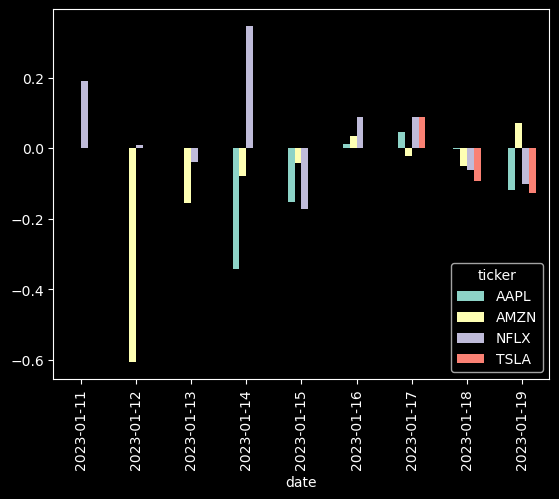

In [1]:
import requests
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

headers = {
    'user-agent': 'my-app'
}


def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        allin = []
        for t in ['AMZN','NFLX', 'AAPL', 'TSLA']:
            params = {
                't': t
            }
            r = req.get(url, params=params)
            df = pd.read_html(r.content, attrs={'id': 'news-table'})[0]
            df[2] = t
            allin.append(df)
        df = pd.concat(allin, ignore_index=True)
        #print(df[2])
        #df.to_csv('data.csv', index=False)
        ###create loop to define day versus time###
        day = 0 #define to be used in loop
        time = 0 #defined to be used in loop
        print(day)

        parsed_data = []
        for i, row in df.iterrows():
            title = df[1].iloc[i]
            ticker = df[2].iloc[i]
            date_data = df.iloc[i][0].split(' ')
            if len(date_data) == 2:
                day = date_data[0]
                time = date_data[1]
            else:
                time = date_data[0]

            parsed_data.append([day, time, ticker, title])

        data = pd.DataFrame(parsed_data, columns=['date', 'time', 'ticker', 'title'])
        data.drop(index=data.index[0], axis=0, inplace=True)
        
        # """apply sentiment analysis"""
        
        vader = SentimentIntensityAnalyzer()

        #defining lambda function
        #compound is used to ignore "negative, positive, neutral" statements and only provide value
        f = lambda title: vader.polarity_scores(title)['compound'] 
        data['compound'] = data['title'].apply(f)
        data['date'] = pd.to_datetime(data['date']).dt.date

        plt.figure(figsize=(100,80))
        plt.style.use('dark_background') #altered look
        mean_df = data.groupby(['ticker', 'date']).mean().unstack()
        mean_df = mean_df.xs('compound', axis="columns").transpose()
        mean_df.plot(kind='bar')
        plt.show()

main('https://finviz.com/quote.ashx')

In [2]:
plt.figure(figsize=(10,8))
plt.style.use('dark_background') #altered look
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='line')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x800 with 0 Axes>